# Boston Housing Exercise (Non Linear)

## Imports

In [1]:
import numpy as np
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('./data//housing.data', delim_whitespace=True, header=None)
df.head()

0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2

In [3]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Preprocess data

In [43]:
from sklearn.model_selection import train_test_split
X = np.array(df['LSTAT']).reshape(-1,1)
y = df['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

## Decision Tree

In [44]:
# 1.
from sklearn.tree import DecisionTreeRegressor
# 2.
tree = DecisionTreeRegressor(max_depth=4)
# 3.
# 4.
tree.fit(X_train,y_train)
# 5.
y_pred_tree = tree.predict(X_test)

Text(0.5, 0, 'RM')

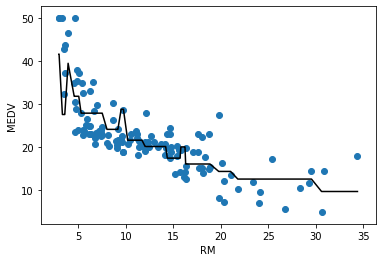

In [45]:
sort_idx = X_test.flatten().argsort()
y_pred_tree_sort = tree.predict(X_test[sort_idx])

plt.plot(X_test[sort_idx],y_pred_tree_sort,color='k')
plt.scatter(X_test,y_test)

plt.ylabel('MEDV')
plt.xlabel('RM')

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
print('Decision Tree MSE:  {}'.format(mean_squared_error(y_test,y_pred_tree)))
print('Decision Tree R2 score:  {}%'.format(r2_score(y_test,y_pred_tree)*100))

Decision Tree MSE:  30.599313375066327
Decision Tree R2 score:  60.88133877378683%


## Random Forest

In [62]:
# 1.
from sklearn.ensemble import RandomForestRegressor
# 2.
rf = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=42, n_jobs=-1)
# 3. All data included
X = df.drop(['MEDV'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
# 4.
rf.fit(X_train,y_train)
# 5.
y_pred_rf = rf.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
print('Random Forest MSE:  {}'.format(mean_squared_error(y_test,y_pred_rf)))
print('Random Forest R2 score:  {}%'.format(r2_score(y_test,y_pred_rf)*100))

Random Forest MSE:  10.091362565669248
Random Forest R2 score:  87.50626693044069%


## AdaBoost

In [64]:
# 1.
from sklearn.ensemble import AdaBoostRegressor
# 2.
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=500,random_state=42)
# 3.All data included
# 4.
ada.fit(X_train,y_train)
# 5.
y_pred_ada = ada.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
print('Ada Boost MSE:  {}'.format(mean_squared_error(y_test,y_pred_ada)))
print('Ada Boost R2 score:  {}%'.format(r2_score(y_test,y_pred_ada)*100))

Ada Boost MSE:  10.486702907334115
Ada Boost R2 score:  87.01681105485926%


### Ada Boost feature importance

In [66]:
ada.feature_importances_

array([0.02983636, 0.00137365, 0.00807373, 0.00060793, 0.02492382,
       0.26847424, 0.01234253, 0.14259809, 0.0064596 , 0.06484536,
       0.03058075, 0.01963324, 0.3902507 ])

In [79]:
importances = pd.DataFrame(ada.feature_importances_,df.columns[:-1], columns=['importances'])
importances

importances
CRIM        0.029836
ZN          0.001374
INDUS       0.008074
CHAS        0.000608
NOX         0.024924
RM          0.268474
AGE         0.012343
DIS         0.142598
RAD         0.006460
TAX         0.064845
PTRATIO     0.030581
B           0.019633
LSTAT       0.390251

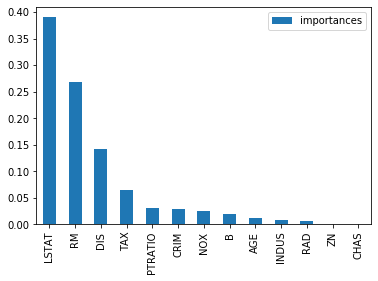

In [80]:
importances.sort_values(by='importances',ascending=False).plot(kind='bar')

## Variance - Bias Tradeoff

Bias of an estimator is its average error for different training sets. 
Variance of an estimator indicates how sensitive it is to varying training sets. 
Noise is a property of data. 
Bias and Variance should be both as low as possible

In validation curve there's:
 * Underfitting: too few flexibility, training and validation scores low
 * Overfitting: too much flexibility, validation score is porr, and training is good

In learning curve:
    * To solve high bias (far from accuracy 1.0): increase the number of parameters (add features) or decrease regularisation. \
    * To solve high variance (training and test do not converge): collect more data, reduce complexity or reduce regularisation

### Learning curve

In [81]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

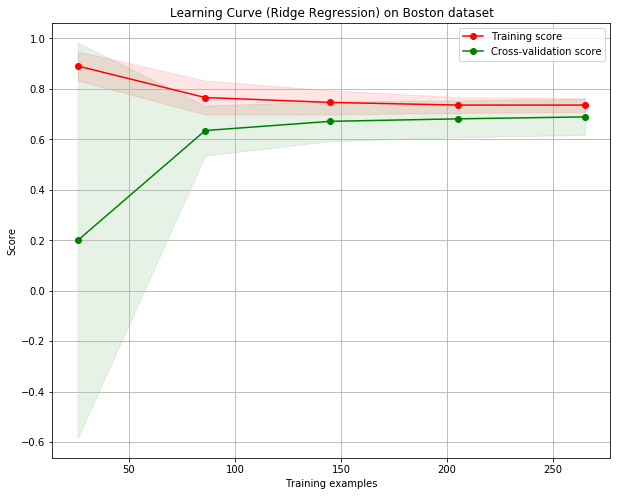

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title = 'Learning Curve (Ridge Regression) on Boston dataset'
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
estimator = Ridge()
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

### Validation Curve

In [83]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

def plot_validation_curve(param_name,param_range,X,y):
    train_scores, valid_scores = validation_curve(Ridge(), 
                                                  X, 
                                                  y, 
                                                  param_name,
                                                  param_range)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(valid_scores, axis=1)
    test_std = np.std(valid_scores, axis=1)
    
    plt.figure(figsize=(10,8))
    plt.plot(param_range, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')
    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color='blue')
    plt.plot(param_range, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(param_range,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Parameter alpha')
    plt.ylabel('Accuracy')
    #plt.ylim([0.8, 1.0])
    return plt

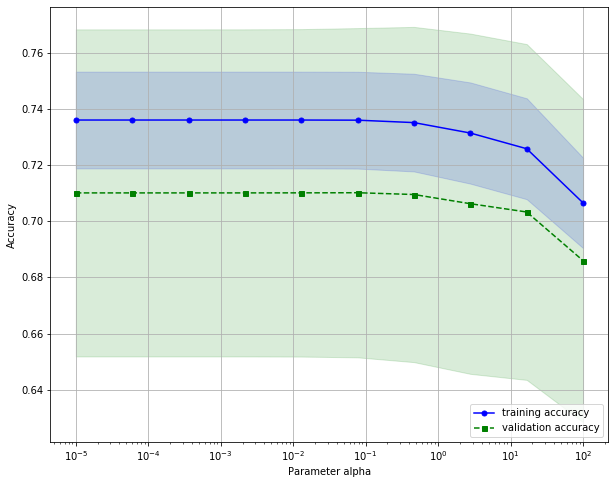

In [84]:
param_name = "alpha"
param_range = np.logspace(-5, 2, 10)

plot_validation_curve(param_name,param_range,X_train,y_train)
plt.show()